# DreamCoder

This notebook is an experimental approach on solving the ARC challenge. See https://arcprize.org/ for more details.

In [1]:
import sys
sys.path.append('./arc2024/dsl')

import torch
import random
from pathlib import Path
from arc2024.dsl.dsl import *
from arc2024.dsl.constants import *
from arc2024.data import ZeroShotDataset
from arc2024.utils import plot

## Prepare Dataset

In [2]:
dataset = ZeroShotDataset(dataset_dir=Path('datasets'))
dataset

# Solving Random Challenge from Training Dataset with DSL

363442ee


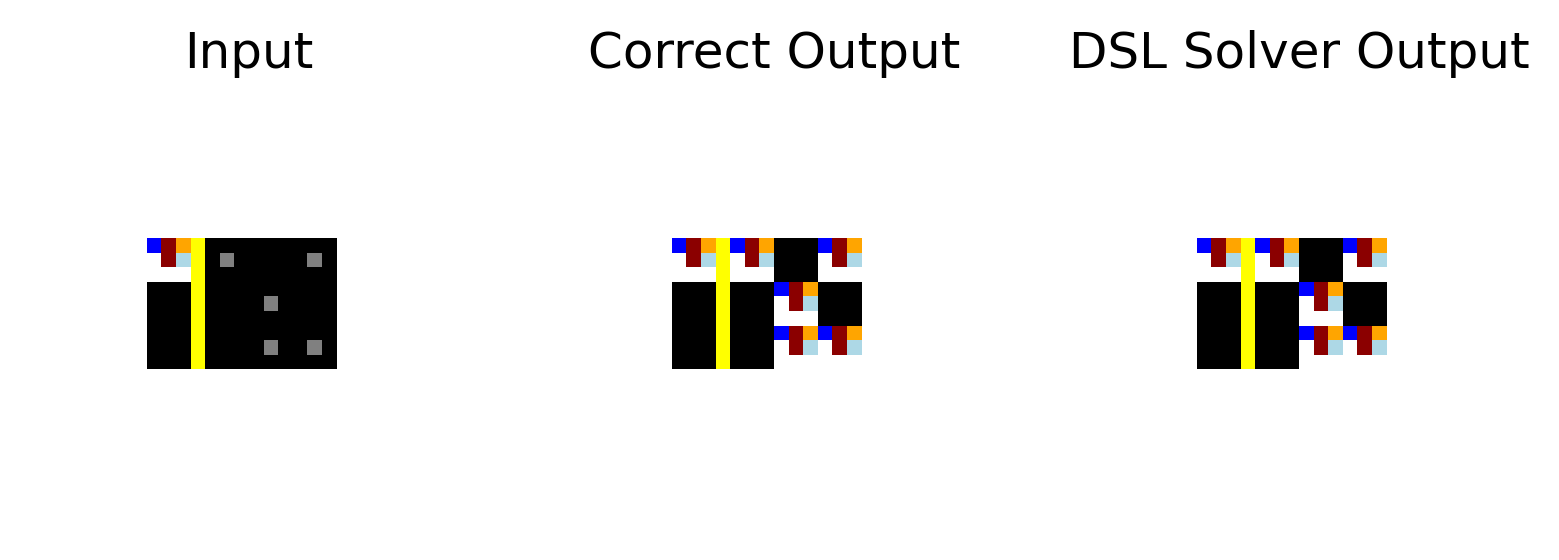

In [3]:
import arc2024.dsl.solvers as solvers

# random.seed(42)

dataset_size = len(dataset)
challenge_index = random.randrange(dataset_size)
challenge_id = dataset.get_id(challenge_index)

X, y = dataset[challenge_index]

to_solvable_ast = lambda g: tuple(tuple(r) for r in g)
solver = getattr(solvers, f'solve_{challenge_id}')

print(challenge_id)
solvable = to_solvable_ast(dataset.unpad(X.squeeze(0)).tolist())
plot.input_and_output(
    X,
    y,
    y_pred=dataset.pad(torch.tensor(solver(solvable))),
    y_pred_title='DSL Solver Output'
)


67a3c6ac


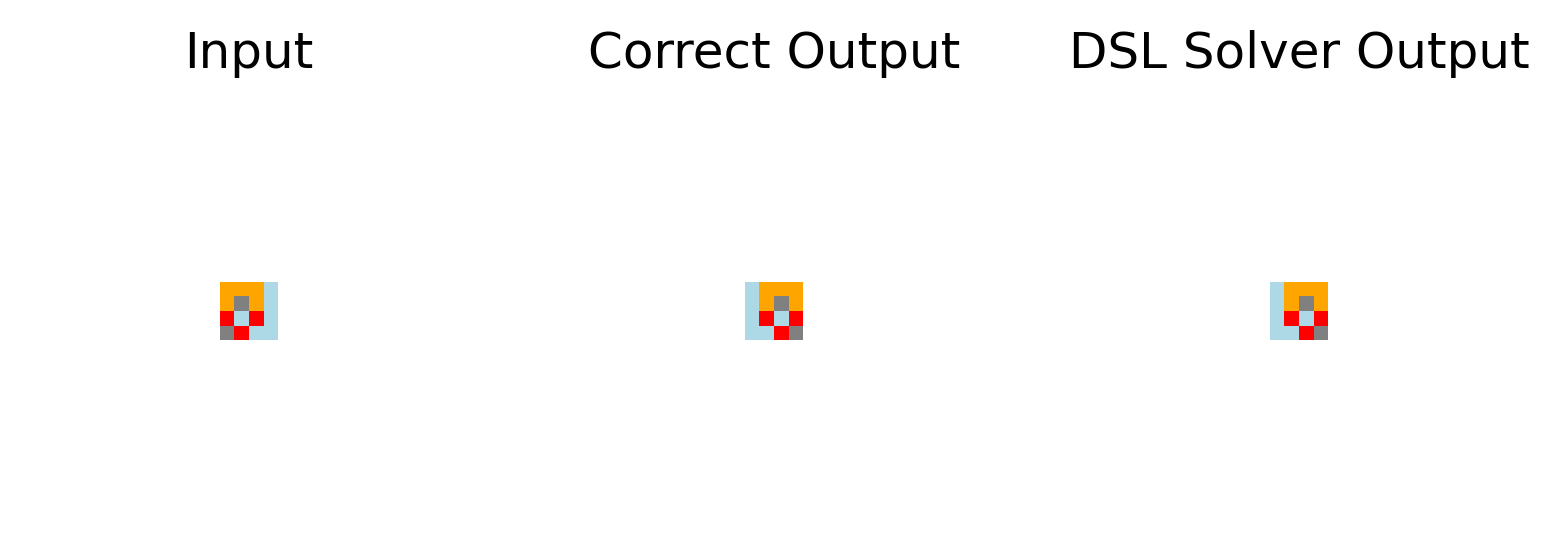

68b16354


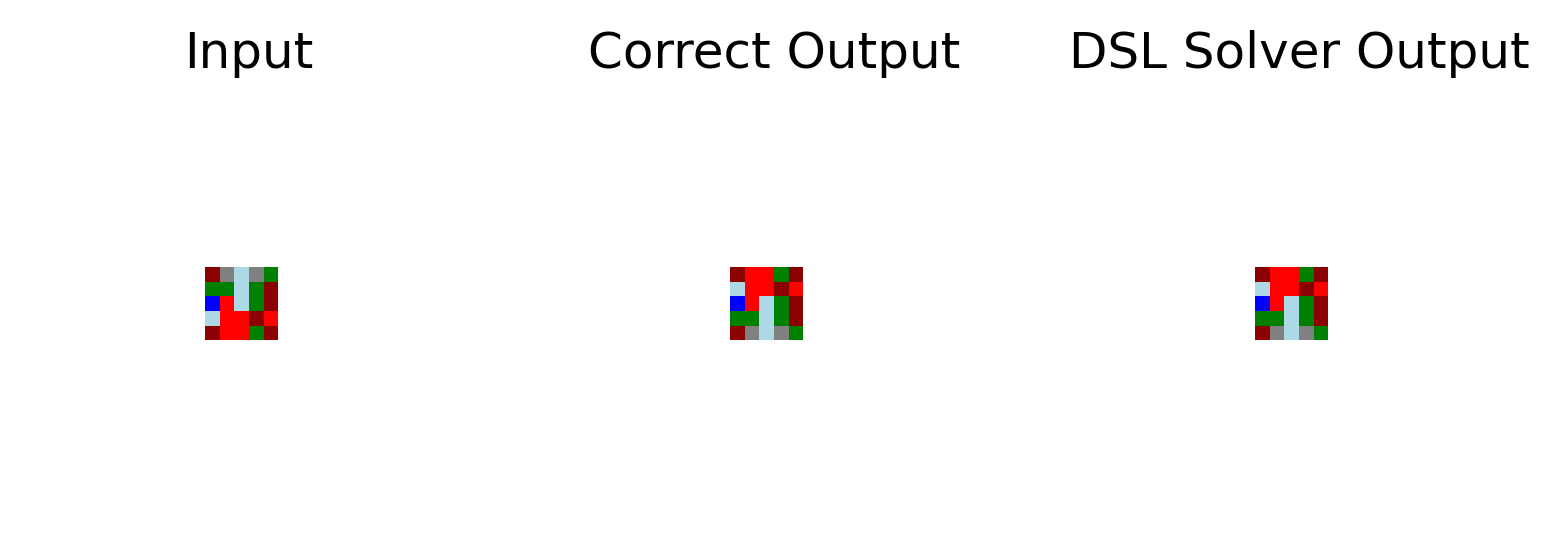

74dd1130


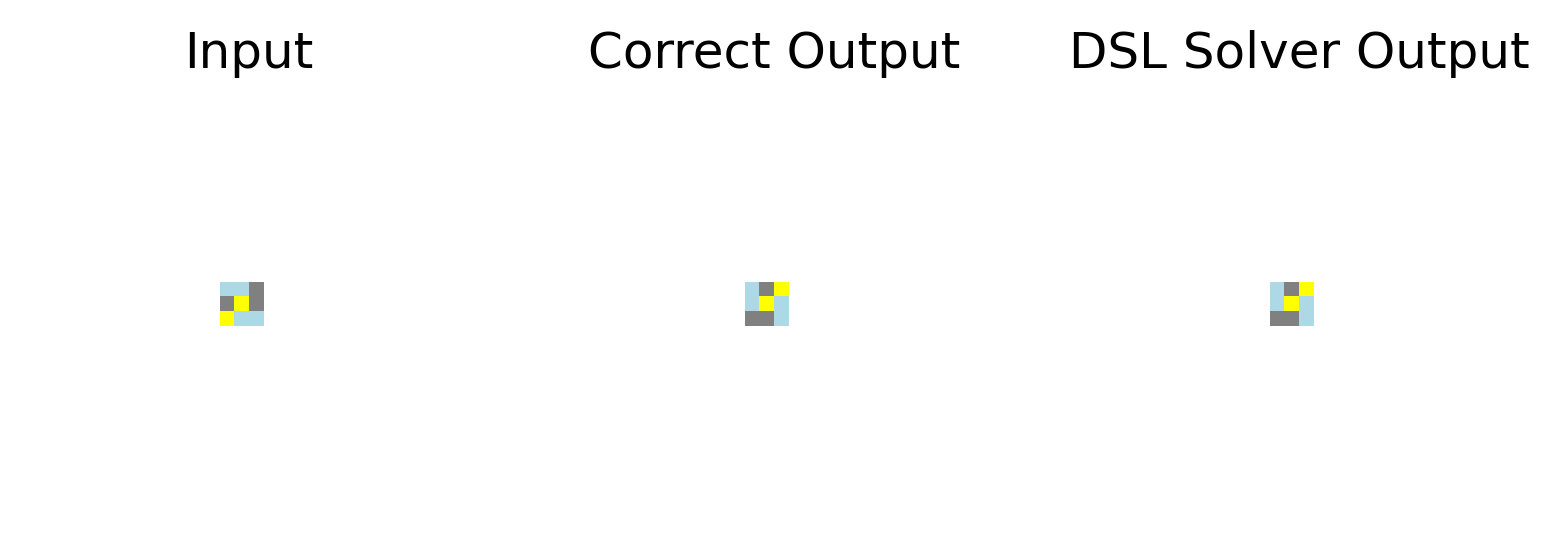

22eb0ac0


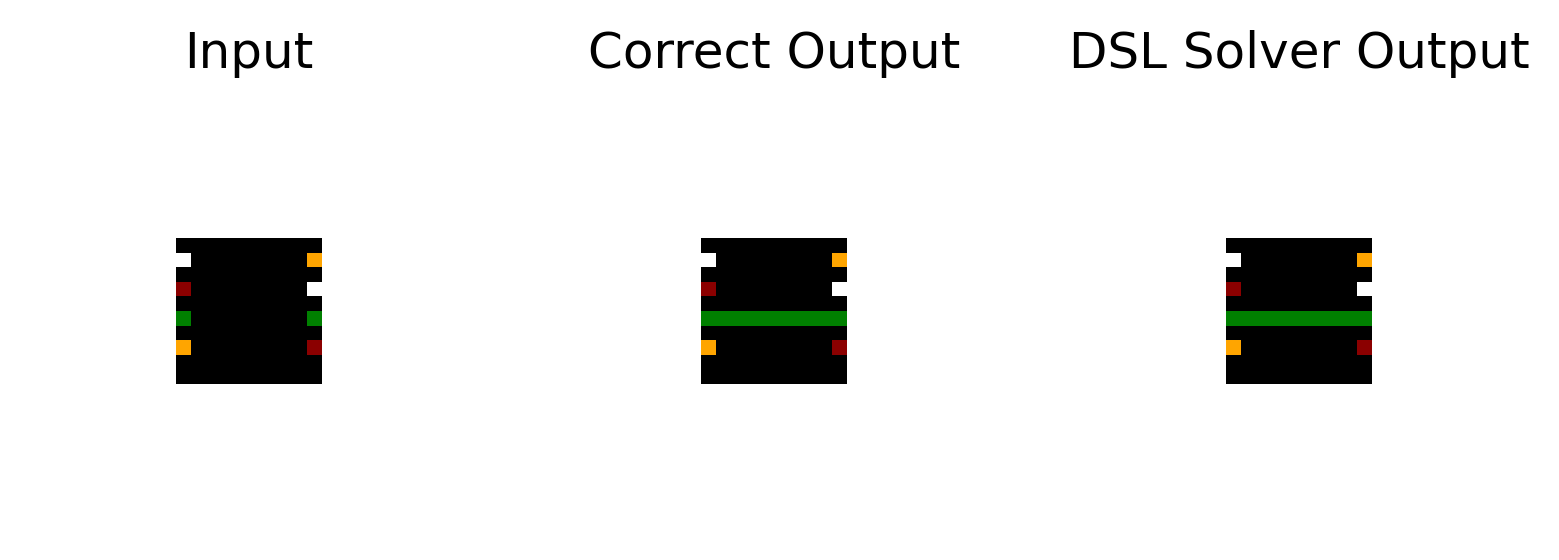

In [5]:
for challenge_id in ['67a3c6ac', '68b16354', '74dd1130', '22eb0ac0']:
    challenge_index = dataset.challenge_ids.index(challenge_id)
    X, y = dataset[challenge_index]
    
    to_solvable_ast = lambda g: tuple(tuple(r) for r in g)
    solver = getattr(solvers, f'solve_{challenge_id}')
    
    print(challenge_id)
    solvable = to_solvable_ast(dataset.unpad(X.squeeze(0)).tolist())
    plot.input_and_output(
        X,
        y,
        y_pred=dataset.pad(torch.tensor(solver(solvable))),
        y_pred_title='DSL Solver Output'
    )